In [1]:
from pyspreads import VerticalGUI

In [2]:
gui = VerticalGUI()

In [ ]:
gui.draw()

(<Figure size 640x480 with 2 Axes>, <AxesSubplot: ylabel='Value'>)

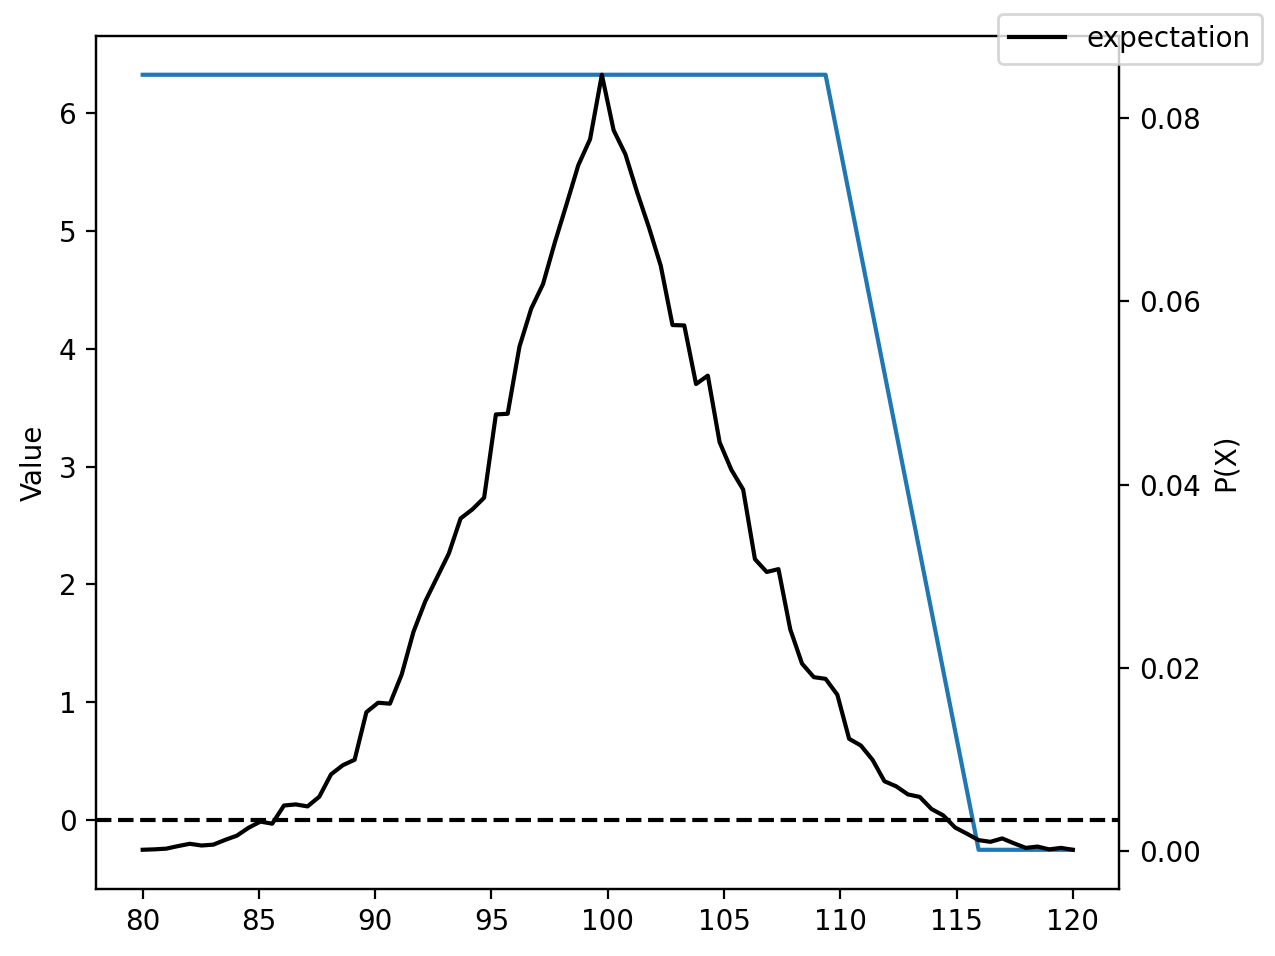

In [6]:
gui.plot_value()

In [1]:
from pyspreads.model import VerticalModel

Expectation: 1.76
Max drawdown: -1.30


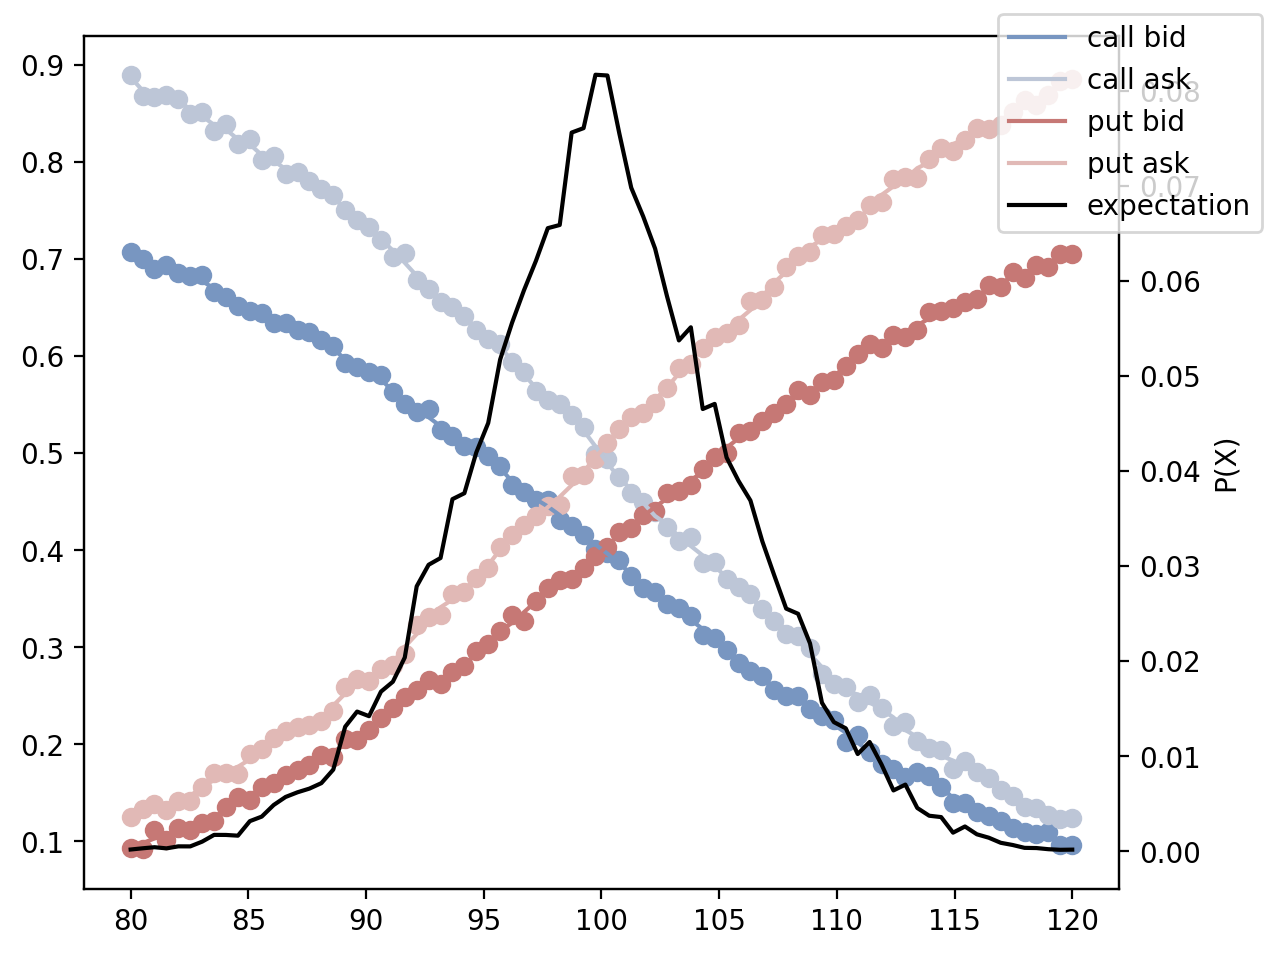

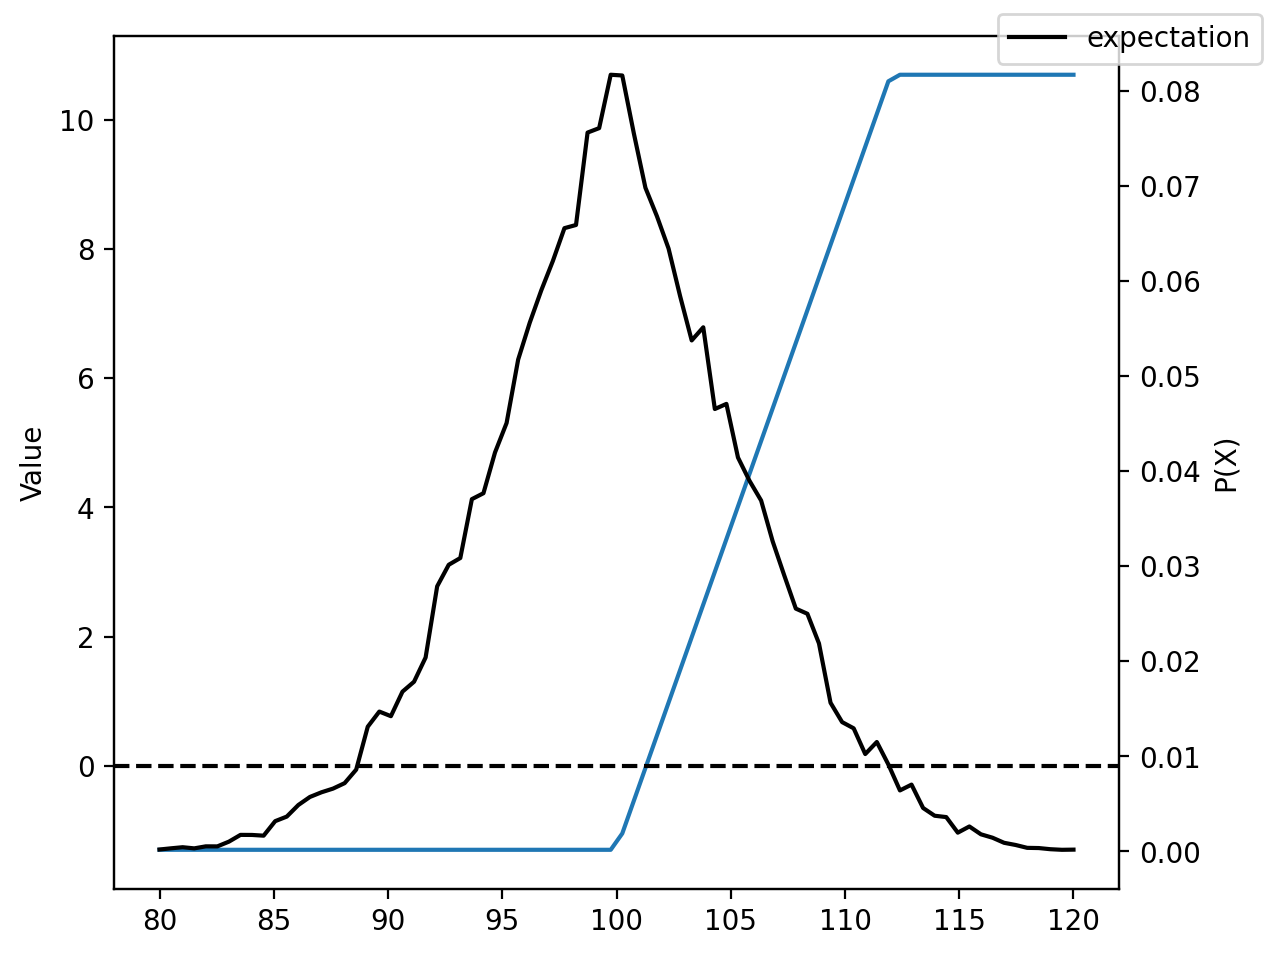

In [2]:
vs = VerticalModel()
vs.buy_call(2, 100)
vs.sell_call(0.5, 115)
vs.remove_position(115, 'short', 'call')
vs.sell_call(0.7, 112)


p1 = vs.plot_environment()
p2 = vs.plot_value()
print(f"Expectation: {vs.expectation:.2f}")
print(f"Max drawdown: {vs.max_drawdown:.2f}")

In [3]:
from ipywidgets import Button, VBox, HBox, Label, GridBox, Layout, Output
from IPython.display import display

In [4]:
item_layout = Layout(width='50px', justify_content='center')
row_layout = Layout(min_height='35px', min_width='500px')

header = HBox(
    [
        Label("Call Bid", layout=item_layout), 
        Label("Call Ask", layout=item_layout), 
        Label("Strike", layout=item_layout), 
        Label("Put Bid", layout=item_layout), 
        Label("Put Ask", layout=item_layout),
    ],
    layout=row_layout
)

rows = []
def price_to_string(price):
    return f"{price:2.2f}"

for row in vs.options_matrix.T:
    rows.append(HBox(
        [
            Button(description=price_to_string(row[1]), layout=item_layout), 
            Button(description=price_to_string(row[2]), layout=item_layout), 
            Label(price_to_string(row[0]), layout=item_layout), 
            Button(description=price_to_string(row[3]), layout=item_layout), 
            Button(description=price_to_string(row[4]), layout=item_layout)
        ],
        layout=row_layout
    ))

panel_layout = Layout(height='500px')
panel = VBox(rows, layout=panel_layout)

environment_panel = VBox([header, panel])

# How to make buttons stay pressed?
# Colour based on in-or-out-of-the-money
# Wire buttons up to take actions in the model on (un)press
# Refactor panel and put it in the source code

In [5]:
env_plot = Output()

with env_plot:
    display(p1[0])
val_plot = Output()
with val_plot:
    display(p2[0])
    
plot_panel = HBox([env_plot, val_plot])

app = HBox([environment_panel, plot_panel])
    
app